# Verification of semi-supervised Gaussian mixture models (ssGMM) on IRIS dataset

***

The purpose of this Jupyter-Notebook is to verify that the semi-supervised Gaussian Mixture Models (ssGMM) code is working properly by applying it to a simple dataset, the IRIS dataset

The contents are organized as follows:
1. Loading the IRIS dataset and plotting the full dataset
2. Splitting the IRIS dataset into training and testing sets
3. Applying supervised methods to the IRIS dataset for comparison purposes
4. Applying ssGMM and verifying the output

For more information on the IRIS dataset, see https://archive.ics.uci.edu/ml/datasets/Iris

In [1]:
##### Versions ######

# matplotlib   : 3.0.3
# numpy        : 1.16.2
# pandas       : 0.24.2
# scipy        : 1.2.1
# scikit-learn : 0.20.3 
# seaborn      : 0.9.0

from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import multivariate_normal

%matplotlib inline

# Step 1: Loading the IRIS dataset

In [2]:
iris = sns.load_dataset("iris")
iris.describe()
## Dataset contains 150 points total, 3 classes, 50 points per class

,sepal_length,sepal_width,petal_length,petal_width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333
std,0.828066,0.435866,1.765298,0.762238
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


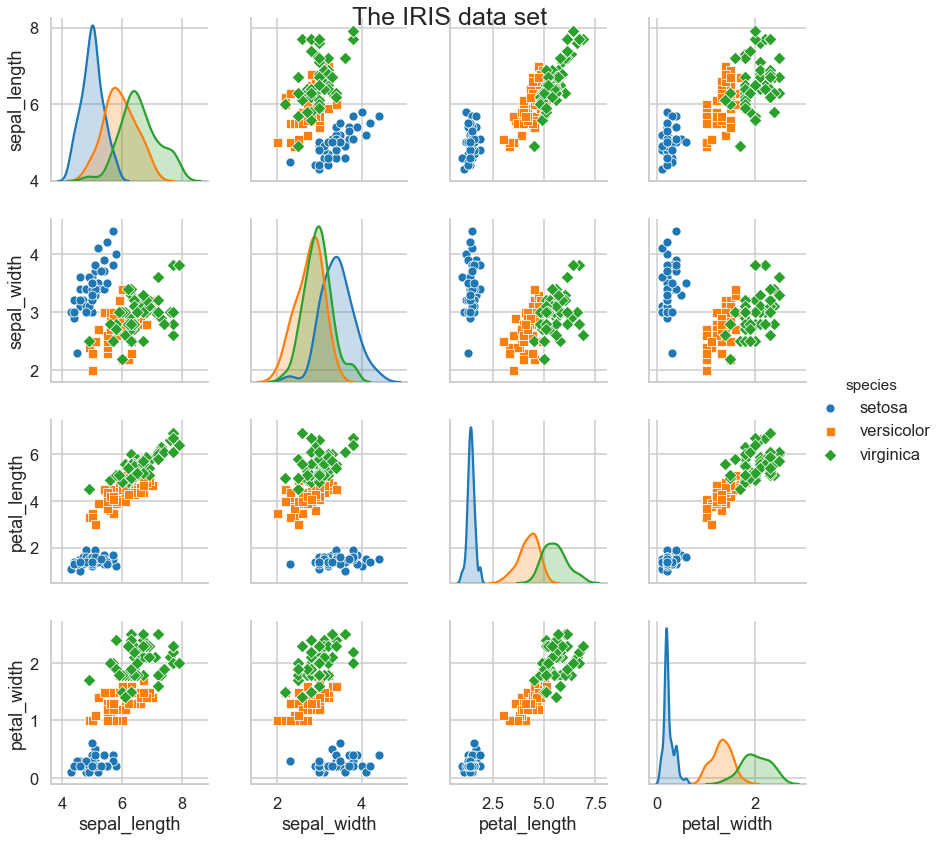

In [3]:
sns.set_style("whitegrid")
sns.set_context("talk")
sns.pairplot(iris, hue = 'species', markers=["o", "s", "D"], height = 3)
plt.suptitle('The IRIS data set', fontsize = 25)
#plt.savefig("IRIS_dataset.png", bbox_inches="tight", dpi = 600)
plt.show()

# Step 2: Splitting the IRIS data into training and testing sets

In [4]:
###########################################################################################
#### Loading a numpy version of the dataset to perform analysis on (instead of Pandas) ####
###########################################################################################

iris_np = datasets.load_iris() 
X = iris_np.data 
y = iris_np.target
(n, d) = np.shape(X)

# Splitting the data into testing/training sets
unlabeled_percentage = 0.90
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=unlabeled_percentage, random_state=60)

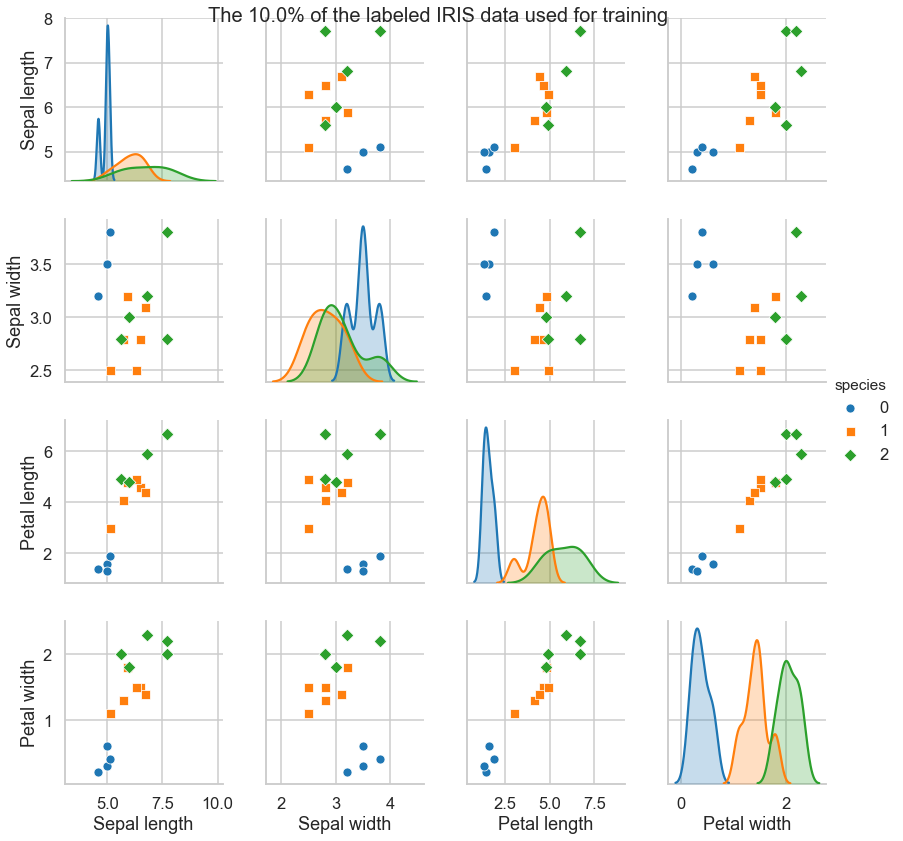

In [5]:
######################################
### Plotting just the labeled data ###
######################################

labeled_data_df = pd.DataFrame({"Sepal length":X_train[:,0], "Sepal width":X_train[:,1], "Petal length":X_train[:,2], "Petal width":X_train[:,3], "species":y_train})
labeled_data_df = labeled_data_df[["Sepal length","Sepal width","Petal length","Petal width","species"]]

sns.set_style("whitegrid")
sns.set_context("talk")
sns.pairplot(labeled_data_df, vars=["Sepal length","Sepal width","Petal length","Petal width"], hue = 'species', markers=["o", "s", "D"], height = 3)

plt.suptitle('The ' + "%.1f" %((1-unlabeled_percentage)*100) + '% of the labeled IRIS data used for training', fontsize = 20)
#plt.savefig("IRIS_dataset_training.png", bbox_inches="tight", dpi = 600)
plt.show()

# Step 3: Supervised classification
For a basis of comparison, supervised classifiers are trained on the small training dataset, and then tested on the remaining data

In [6]:
###################################
##### Naive Bayes Classifier ######
###################################

gnb = GaussianNB()
gnb.fit(X_train, y_train)
y_pred_gnb = gnb.predict(X_test)
gnb_accuracy = accuracy_score(y_test, y_pred_gnb)
print("Accuracy of Bayes classifier when training on " + "%.1f" %((1-unlabeled_percentage)*100) + "% of the data: \n", + gnb_accuracy)
print()

###############################################
### Support Vector Machine (SVM) classifier ###
###############################################
SVC_parameters = [{'kernel': ['rbf'], 'gamma': np.logspace(-2,1,16), 'C': np.logspace(-1,2,16), 'tol': [0.01]}]
print("Tuning SVC hyper-parameters for accuracy score with grid search")
svc = GridSearchCV(SVC(), SVC_parameters, cv = 3, scoring='accuracy')
svc.fit(X_train, y_train)
print("Best SVC parameters set found on development set:")
print(svc.best_params_)
#print("Grid scores on development set:")
#means = svc.cv_results_['mean_test_score']
#stds = svc.cv_results_['std_test_score']
#for mean, std, params in zip(means, stds, svc.cv_results_['params']):
#    print("%0.3f (+/-%0.03f) for %r" % (mean, std * 2, params))
y_pred_svc = svc.predict(X_test)
svc_accuracy = accuracy_score(y_test, y_pred_svc)
print("Accuracy of SVC classifier when training on " + "%.1f" %((1-unlabeled_percentage)*100) + "% of the data: \n", + svc_accuracy)
print()

### AdaBoost classifier ###
AdaBoost_parameters = [{'n_estimators': [10,25,50,75,100], 'learning_rate': [0.1, 0.2, 0.3, 0.4, 0.5]}]
print("Tuning AdaBoost hyper-parameters for accuracy score with grid search")
boost = GridSearchCV(AdaBoostClassifier(), AdaBoost_parameters, cv = 3, scoring='accuracy')
boost.fit(X_train, y_train)
print("Best AdaBoost parameters set found on development set:")
print(boost.best_params_)
#print("Grid scores on development set:")
#means = boost.cv_results_['mean_test_score']
#stds = boost.cv_results_['std_test_score']
#for mean, std, params in zip(means, stds, boost.cv_results_['params']):
#    print("%0.3f (+/-%0.03f) for %r" % (mean, std * 2, params))
y_pred_boost = boost.predict(X_test)
boost_accuracy = accuracy_score(y_test, y_pred_boost)
print("Accuracy of AdaBoost classifier when training on " + "%.1f" %((1-unlabeled_percentage)*100) + "% of the data: \n", + boost_accuracy)
print()


Accuracy of Bayes classifier when training on 10.0% of the data: 
 0.9407407407407408

Tuning SVC hyper-parameters for accuracy score with grid search


C:\Users\mwdunham\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


Best SVC parameters set found on development set:
{'C': 15.848931924611142, 'gamma': 0.6309573444801934, 'kernel': 'rbf', 'tol': 0.01}
Accuracy of SVC classifier when training on 10.0% of the data: 
 0.9259259259259259

Tuning AdaBoost hyper-parameters for accuracy score with grid search
Best AdaBoost parameters set found on development set:
{'learning_rate': 0.3, 'n_estimators': 50}
Accuracy of AdaBoost classifier when training on 10.0% of the data: 
 0.8518518518518519



C:\Users\mwdunham\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


# Step 4: Semi-supervised Gaussian mixture models (ssGMM) 

In [7]:
import sys
sys.path.append('../ssGMM_code/')
from ssGMM import ss_GaussianMixtureModels

In [8]:
## Simply choosing default parameters for beta and tol (i.e. no cross-validation)
ss_GMMresults = ss_GaussianMixtureModels(X_train, y_train, X_test, y_test, K = 3, beta = 0.50, max_iterations = 20, tol = 0.1, cond_tolerance = 1E-10)

Number of labeled data: 15
Number of unlabeled data: 135
The number of iterations used:  7
The objective function: 
 [-339.5558322957276, -96.1084467834161, -94.61515985426288, -93.43178286116361, -92.75517515695209, -92.39528204541384, -92.2316398202633, -92.16102026912966]
Standard accuracy metric of Semi-supervised GMM using beta = 0.5, and tol = 0.1: 0.9851851851851852
Number of misclassified points: 2/135



In [9]:
### Computing the accuracy of the predictions for the unlabeled data
ssGMM_accuracy = accuracy_score(y_test, ss_GMMresults[0])
print("Accuracy of ssGMM when training on " + "%.1f" %((1-unlabeled_percentage)*100) + "% of the data: \n" + "%.2f" %(ssGMM_accuracy*100))
    
    ############################################################################################
    #### if the parameters in the notebook remain unchanged, the accuracy should be 98.52% #####
    ############################################################################################

Accuracy of ssGMM when training on 10.0% of the data: 
98.52


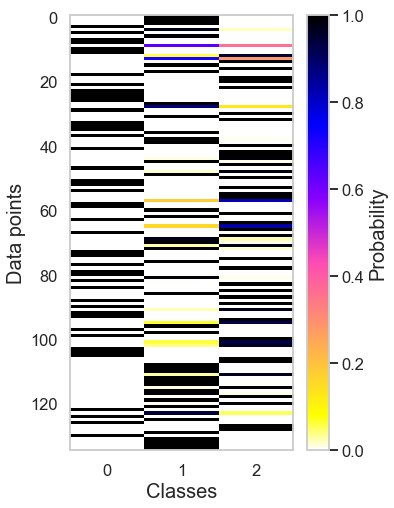

In [14]:
### Plotting the soft-prediction matrix
plt.imshow(ss_GMMresults[1], aspect = 'auto', cmap = 'gnuplot2_r')
plt.grid(False)
plt.colorbar().set_label('Probability', fontsize = 20)
plt.xlabel("Classes", fontsize = 20)
plt.ylabel("Data points", fontsize = 20)
plt.rcParams["figure.figsize"] = [5,8]
#plt.savefig("IRIS_ssGMM_GAMMA_matrix.png", bbox_inches="tight", dpi = 600)
plt.show()

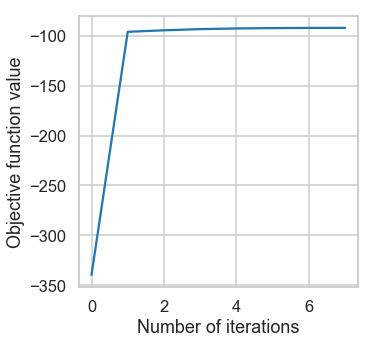

In [17]:
### Plotting the objective function vs. iterations
plt.plot(ss_GMMresults[2])
plt.xlabel("Number of iterations", fontsize = 18)
plt.ylabel("Objective function value", fontsize = 18)
plt.rcParams["figure.figsize"] = [5,5]
#plt.savefig("IRIS_ssGMM_objective_function.png", bbox_inches="tight", dpi = 600)
plt.show()